In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from uncertainties import ufloat
import uncertainties.unumpy as unp 

In [5]:
def f(I_max, I_min):
    return (I_max-I_min)/(I_max + I_min)

In [4]:
f(2.75, 0.25)

0.8333333333333334

In [6]:
f(2.84,0.08)

0.9452054794520548

In [27]:
df = pd.read_csv('kontrast.csv')
df

I_err = 0.01

phi = df["phi"].to_numpy()
phi_rad = np.deg2rad(phi)
I_min = unp.uarray( df["I_min"].to_numpy(), I_err)
I_max = unp.uarray( df["I_max"].to_numpy(), I_err)



In [28]:
K = f(I_max, I_min)
print(K)

[0.10614525139664802+/-0.007945017254390563
 0.26153846153846155+/-0.011244471971805638
 0.7111111111111111+/-0.019281405437387298
 0.761904761904762+/-0.02116570827958557
 0.8666666666666668+/-0.02079358347795289
 0.9157894736842105+/-0.020185677487957233
 0.9019607843137254+/-0.018671430313860943
 0.8448275862068966+/-0.015959845060102396
 0.47239263803680986+/-0.009595510968178823
 0.14018691588785043+/-0.00667309474885634
 0.5662650602409638+/-0.006526953589361686
 0.8688524590163933+/-0.00614245401866666
 0.9047619047619048+/-0.006054417050491545
 0.9047619047619047+/-0.006486875411240942
 0.9075907590759075+/-0.006303061826969608
 0.8345323741007195+/-0.0066258256259081666
 0.5882352941176471+/-0.006032147785891588
 0.3275862068965517+/-0.006414490376646874
 0.10989010989010986+/-0.00781718046127801]


In [29]:
def f_sin(x, A):
    return A* np.abs(np.sin(x)*np.cos(x))

In [33]:
param, cov = curve_fit(f_sin, phi_rad, unp.nominal_values(K), sigma=unp.std_devs(K), absolute_sigma=True)
uncertainties = np.sqrt(np.diag(cov))
print(param)
print(uncertainties)

[1.82323088]
[0.0050143]


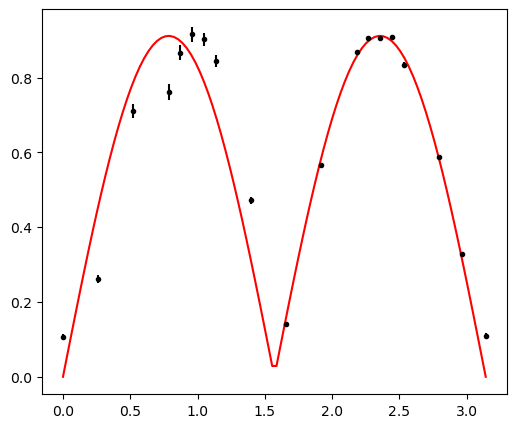

In [40]:
phi_lin = np.linspace(phi_rad.min(), phi_rad.max(), 100)
plt.figure(figsize=(6,5))

plt.errorbar(phi_rad, unp.nominal_values(K), yerr=unp.std_devs(K),  fmt='k.', label='Kontrast')
plt.plot(phi_lin, f_sin(phi_lin, *param), 'r-', label='fit')
plt.show()

In [47]:
lambda_0 = 632.990 *10**(-6) #mm
theta = 10*(2*np.pi/360) #rad
D = 1 #mm

def n(M):
    return 1/(1 -  (M*lambda_0)/(2*D*theta*theta)  )


In [50]:
M = np.array([32, 35, 33, 37, 32, 38, 29, 36, 34, 34])

print(n(M))
print(np.mean(n(M)))

[1.49807656 1.57145515 1.52176263 1.62450261 1.49807656 1.65239243
 1.43124504 1.59753863 1.54620974 1.54620974]
1.5487469092448585
